## 7.3 Interpretation of confidence intervals

Having calculated a confidence interval for our unknown population age, $\mu$, how do we interpret it? 

### 7.3.1 Operational definition

For the 95% confidence interval calculated above $(26.6, 32.5)$, it is tempting to say that the probability that the population mean age, $\mu$, is between 26.6 and 32.5 is 95%. However, this is incorrect, because this  implies that $\mu$ has a probability distribution, rather than being a fixed unknown number. Either the true value of $\mu$ lies within the interval 26.6 to 32.5, or it does not.

Strictly, the interpretation of a confidence interval has to be with respect to the process of repeated sampling: if we repeated the study an infinite number of times, 95% of the 95% confidence intervals calculated would include the true population mean $\mu$. 


### 7.3.2 Looser interpretation (practical)

The operational definition is long-winded and not always helpful for communicating results. In practice,  we often loosely interpret a 95% confidence interval by saying

- that we are 95% confident that the true population mean lies within the 95% confidence interval calculated.
- that our data are consistent with values of the population mean within the 95% confidence interval calculated

### 7.3.3 Confidence intervals under repeated sampling

In order to see how confidence intervals behave under repeated sampling, we will now randomly draw 100 different samples of 10 people. Within each sample, we calculate the sample mean and the 95% confidence interval (assuming the population value $\sigma$ is known). 

We expect
* the point estimates to cluster around the true value of $\mu$, and fall symmetrically either side
* 95% of the confidence intervals to include the true value
* 2.5% of the intervals to lie entirely above the true value
* 2.5% of the intervals to lie entirely below the true value


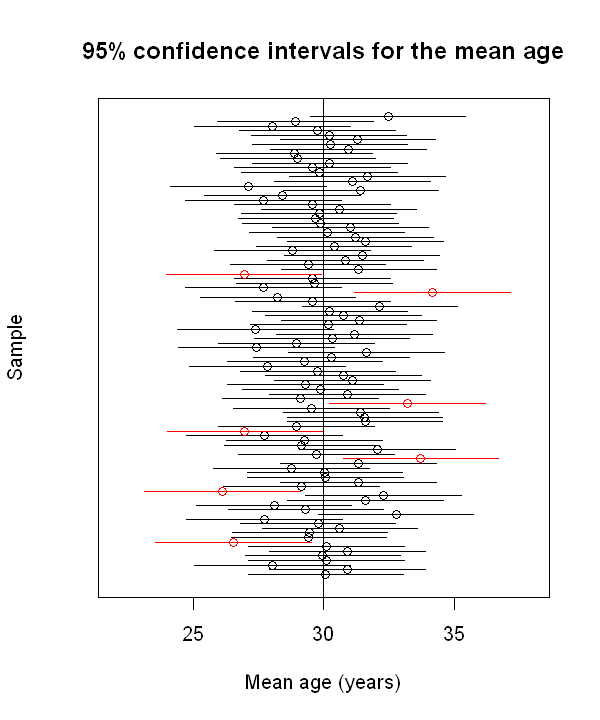

In [1]:
# Population parameters
mu <- 30
sd <- 4.8
n_in_study <- 10

# Take 100 samples of 10 people, measure ages in each set of 10 people
different_studies <- 100
set.seed(1042)
study_measurements_age <- list()
for (i in 1:different_studies) {
  study_measurements_age[[i]] <-  rnorm(n_in_study, mu, sd)
}

# Calculate sample means and 95% confidence intervals
sample.means   <- sapply(study_measurements_age, mean)
sample.cl   <- sapply(study_measurements_age, function (x) mean(x) - 1.96*1.52)
sample.cu   <- sapply(study_measurements_age, function (x) mean(x) + 1.96*1.52)

# Extract means and CIs for samples which miss the true value
out <- ((sample.cl>30) + (sample.cu<30))
out.means <- sample.means[out==1]
out.cl <- sample.cl[out==1]
out.cu <- sample.cu[out==1]
out.samples <- seq(1,100,1)[out==1]

# Graph all the sample means and CIs
options(repr.plot.width=5, repr.plot.height=6)
plot(sample.means, seq(1,100,1), main="95% confidence intervals for the mean age", xlab="Mean age (years)", ylab="Sample", xlim=c(22, 38), ylim=c(0, 100), yaxt="none")
abline(v=30)
for (i in 1:100) {
  eval(lines(c(sample.cl[i], sample.cu[i]), c(i, i)))
}

# Highlight the CIs that miss the true value in red
points(out.means, out.samples, col="red")
for (i in 1:length(out.samples)) {
  eval(lines(c(out.cl[i], out.cu[i]), c(out.samples[i],out.samples[i]), col="red"))
}
